## 1. Import Library

In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer

## 2. Memuat Dataset

In [79]:
# Load Dataset
df = pd.read_csv('/content/drive/MyDrive/Dataset/Dicoding Submission/Machine Learning Pemula/Bank Transaction Dataset for Fraud Detection/bank_transactions_data_edited.csv')

## 3. Exploratory Dataset Analyze (EDA)

In [80]:
# Ketahui Struktur Dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2537 entries, 0 to 2536
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2508 non-null   object 
 1   AccountID                2516 non-null   object 
 2   TransactionAmount        2511 non-null   float64
 3   TransactionDate          2509 non-null   object 
 4   TransactionType          2507 non-null   object 
 5   Location                 2507 non-null   object 
 6   DeviceID                 2507 non-null   object 
 7   IP Address               2517 non-null   object 
 8   MerchantID               2514 non-null   object 
 9   Channel                  2510 non-null   object 
 10  CustomerAge              2519 non-null   float64
 11  CustomerOccupation       2514 non-null   object 
 12  TransactionDuration      2511 non-null   float64
 13  LoginAttempts            2516 non-null   float64
 14  AccountBalance          

In [81]:
df.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70.0,Doctor,81.0,1.0,5112.21,2024-11-04 08:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68.0,Doctor,141.0,1.0,13758.91,2024-11-04 08:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19.0,Student,56.0,1.0,1122.35,2024-11-04 08:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26.0,Student,25.0,1.0,8569.06,2024-11-04 08:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,NaN,Student,198.0,1.0,7429.40,2024-11-04 08:06:39


In [82]:
df.isnull().sum()

,0
TransactionID,29
AccountID,21
TransactionAmount,26
TransactionDate,28
TransactionType,30
Location,30
DeviceID,30
IP Address,20
MerchantID,23
Channel,27


In [83]:
df.duplicated().sum()

np.int64(21)

In [84]:
# Lihat statistik deskriptif dari dataset
df.describe()

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance
count,2511.000000,2519.000000,2511.000000,2516.000000,2510.000000
mean,297.656468,44.678444,119.422939,1.121622,5113.438124
std,292.230367,17.837359,70.078513,0.594469,3897.975861
min,0.260000,18.000000,10.000000,1.000000,101.250000
25%,81.310000,27.000000,63.000000,1.000000,1504.727500
50%,211.360000,45.000000,112.000000,1.000000,4734.110000
75%,413.105000,59.000000,161.000000,1.000000,7672.687500
max,1919.110000,80.000000,300.000000,5.000000,14977.990000


In [85]:
df.sample()

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
1627,TX001628,AC00141,398.7,2023-08-28 16:02:11,Debit,Albuquerque,D000426,198.39.35.23,M006,ATM,47.0,Doctor,276.0,1.0,7987.74,2024-11-04 08:09:04


In [86]:
# Ketahui Tipe transaksi yang ada
df['TransactionType'].unique()

array(['Debit', 'Credit', nan], dtype=object)

In [87]:
# Ketahui saluran transaksi
df['Channel'].unique()

array(['ATM', 'Online', 'Branch', nan], dtype=object)

In [88]:
# Ketahui jumlah percobaan login yang tersedia
df['LoginAttempts'].unique()

array([ 1.,  3.,  5., nan,  2.,  4.])

In [89]:
# Ubah 'TransactionDate' dan 'PreviousTransactionDate' menjadi `datetime` untuk mempermudah analisis transaksi berdasarkan waktu
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'], errors='coerce')
df['PreviousTransactionDate'] = pd.to_datetime(df['PreviousTransactionDate'], errors='coerce')

df = df.set_index('TransactionDate', drop=False) # Atur 'TransactionDate' sebagai index agar data diurutkan berdasarkan waktu

In [90]:
# Ketahui Rentang waktu data yang disediakan dataset
print("Data Terlama: ", df['TransactionDate'].min())
print("Data Terbaru: ", df['TransactionDate'].max())

Data Terlama:  2023-01-02 16:00:06
Data Terbaru:  2024-01-01 18:21:50


/tmp/ipython-input-1236273541.py:2: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  hour = df.resample('H')['TransactionAmount'].mean()


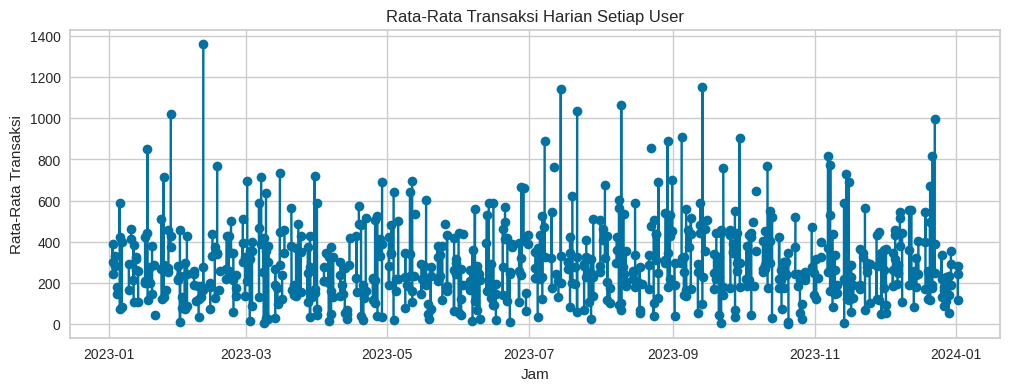

In [91]:
# Rata-Rata Tren transaksi per hari
hour = df.resample('H')['TransactionAmount'].mean()

plt.figure(figsize=(12,4))
plt.plot(hour.index, hour.values, marker='o', linestyle='-')
plt.title("Rata-Rata Transaksi Harian Setiap User")
plt.xlabel("Jam")
plt.ylabel("Rata-Rata Transaksi")
plt.grid(True)
plt.show()

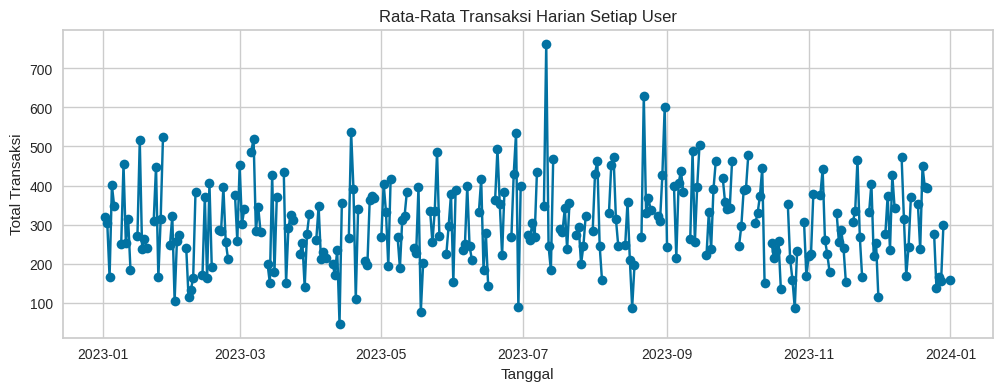

In [92]:
# Rata-Rata Tren transaksi per hari
daily = df.resample('D')['TransactionAmount'].mean()

plt.figure(figsize=(12,4))
plt.plot(daily.index, daily.values, marker='o', linestyle='-')
plt.title("Rata-Rata Transaksi Harian Setiap User")
plt.xlabel("Tanggal")
plt.ylabel("Total Transaksi")
plt.grid(True)
plt.show()

## 4. Pembersihan Data

## 5. Pre-processing Data

## 6. Menentukan Jumlah Cluster

## 7. Membangun Model Clustering

## 8. Penilaian (Opsional)

### Feature Selection

### Penggunaan Algoritma Lain

### Mencapai nilai Silhoutte 0.70